In [327]:
%pip install ucimlrepo

In [328]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import ConfusionMatrixDisplay

In [329]:
torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [330]:
# fetch dataset
dry_bean_dataset = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean_dataset.data.features
y = dry_bean_dataset.data.targets
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


from matplotlib import pyplot as plt
_df_14['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Perimeter'].plot(kind='hist', bins=20, title='Perimeter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['MajorAxisLength'].plot(kind='hist', bins=20, title='MajorAxisLength')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['MinorAxisLength'].plot(kind='hist', bins=20, title='MinorAxisLength')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Area', y='Perimeter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Perimeter', y='MajorAxisLength', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='MajorAxisLength', y='MinorAxisLength', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='MinorAxisLength', y='AspectRatio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Area'].plot(kind='line', figsize=(8, 4), title='Area')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Perimeter'].plot(kind='line', figsize=(8, 4), title='Perimeter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['MajorAxisLength'].plot(kind='line', figsize=(8, 4), title='MajorAxisLength')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['MinorAxisLength'].plot(kind='line', figsize=(8, 4), title='MinorAxisLength')
plt.gca().spines[['top', 'right']].set_visible(False)

In [331]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

y['Class']= label_encoder.fit_transform(y['Class'])
y

<ipython-input-331-8b7533e8abd7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class']= label_encoder.fit_transform(y['Class'])


,Class
0,5
1,5
2,5
3,5
4,5
...,...
13606,3
13607,3
13608,3
13609,3


from matplotlib import pyplot as plt
_df_26['Class'].plot(kind='hist', bins=20, title='Class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Class'].plot(kind='line', figsize=(8, 4), title='Class')
plt.gca().spines[['top', 'right']].set_visible(False)

In [332]:
scaler = StandardScaler()

# Fit and transform the entire DataFrame
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display the standardized DataFrame
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100894,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,-0.123703,0.153343,-0.378191,-0.364148,-0.716284,0.684173,0.727872,0.032433,0.261424,0.055629,-0.006086,0.760813
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.432979,-0.165141,-0.378662,-0.363962,1.022933,0.774384,0.818807,0.362794,0.110383,0.285117,0.328393,0.722659
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.448618,-0.182940,-0.376143,-0.362197,-0.403392,0.591370,0.758468,0.370533,0.104270,0.289205,0.336328,0.390251
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.380735,-0.106960,-0.372851,-0.361825,-0.903414,0.143717,0.581753,0.285098,0.141907,0.228375,0.248973,0.036440


In [333]:
X=X.to_numpy()
y=y.to_numpy()
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
X_train

array([[-0.81752445, -1.02169402, -0.99287338, ...,  0.87726787,
         0.26689369,  0.34819918],
       [-0.5100868 , -0.46712995, -0.57257078, ...,  0.32942131,
         0.16578407,  0.05365717],
       [-0.75296766, -0.95088074, -1.05002561, ...,  1.38279192,
         1.01759324,  0.34826469],
       ...,
       [ 1.26029711,  1.40616472,  1.595202  , ..., -1.29550474,
        -0.95452972, -0.23543445],
       [-0.49866232, -0.67141233, -0.85709382, ...,  1.41551308,
         1.61954278,  0.86165139],
       [ 0.36079899,  0.6631759 ,  0.94108189, ..., -1.22108034,
        -1.40651082, -0.99763587]])

In [334]:
# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Create DataLoader for training set
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
train_dl = DataLoader(train_ds, batch_size=100, shuffle=True)

test_ds = TensorDataset(X_test_tensor, y_test_tensor)
test_dl = DataLoader(test_ds, batch_size=100, shuffle=False)

In [335]:
print(len(X[0]))

16


In [336]:
n_features=16
n_layer_1 = 200
n_layer_2 = 100
n_layer_3 =  50
n_class = 7

In [337]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.fc1 = nn.Linear(n_features, n_layer_1)
    self.fc2 = nn.Linear(n_layer_1, n_layer_2)
    self.fc3 = nn.Linear(n_layer_2, n_layer_3)
    self.fc4 = nn.Linear(n_layer_3, n_class)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [338]:
model = NeuralNetwork().to(device)

In [339]:
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)

In [340]:
num_epochs = 10
epochs = tqdm(range(num_epochs))

for epoch in epochs:
    train_loss = []
    model.train()
    for batch in (train_dl):
        optim.zero_grad()

        feature = batch[0].to(device)
        label = batch[1].to(device)

        label = label.squeeze()

        output = model(feature)

        loss = torch.nn.CrossEntropyLoss()(output, label)
        loss.backward()
        optim.step()
        train_loss.append(loss.item())

    loss_now = np.mean(train_loss)
    epochs.set_postfix({'loss': loss_now})


  0%|          | 0/10 [00:00<?, ?it/s]

In [341]:
predlist = torch.zeros(0, dtype=torch.long, device='cpu')
lbllist = torch.zeros(0, dtype=torch.long, device='cpu')

with torch.no_grad():
  for input, labels in test_dl:
    # input = input.reshape(-1, n_features).to(device)
    input = input.to(device)
    labels = labels.to(device)
    outputs=model(input)
    _, predicted = torch.max(outputs.data, 1)
    predlist=torch.cat([predlist, predicted.view(-1).cpu()])
    lbllist=torch.cat([lbllist, labels.view(-1).cpu()])
print(predlist)
print(lbllist)

tensor([5, 0, 5,  ..., 3, 2, 3])
tensor([5, 0, 5,  ..., 3, 2, 6])


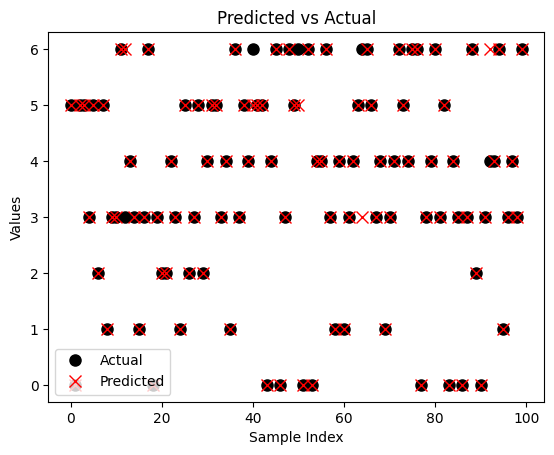

In [342]:
predicted_labels = np.array(predlist)
actual_labels = np.array(lbllist)

accuracy = accuracy_score(actual_labels, predicted_labels)
correct_predictions = (predicted_labels == actual_labels)

plt.plot(actual_labels[:100], label='Actual', marker='o', linestyle='', markersize=8, color="black")
plt.plot(predicted_labels[:100], label='Predicted', marker='x', linestyle='', markersize=8, color="red")
plt.title('Predicted vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.show()


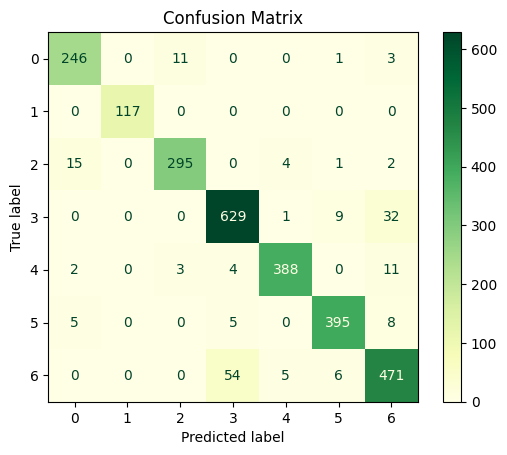

In [343]:
cm = confusion_matrix(actual_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(actual_labels))
disp.plot(cmap=plt.cm.YlGn)
plt.title('Confusion Matrix')
plt.show()

In [344]:
print(classification_report(np.asarray(lbllist), np.asarray(predlist), digits=3))

              precision    recall  f1-score   support

           0      0.918     0.943     0.930       261
           1      1.000     1.000     1.000       117
           2      0.955     0.931     0.942       317
           3      0.909     0.937     0.923       671
           4      0.975     0.951     0.963       408
           5      0.959     0.956     0.958       413
           6      0.894     0.879     0.886       536

    accuracy                          0.933      2723
   macro avg      0.944     0.942     0.943      2723
weighted avg      0.933     0.933     0.933      2723

